# Statistical inference - Sampling distributions

### Data

- We are considering the information from the city of Ames, Iowa. The details of each and every land exchange in Ames is recorded by the City Assessor's office. Our specific concentration for this lab will be all private home deals in Ames somewhere in the range of 2006 and 2010. This assortment addresses our population of interest.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np
import pandas as pd
import io
import requests

df_url = 'https://raw.githubusercontent.com/akmand/datasets/master/openintro/ames.csv'
url_content = requests.get(df_url, verify=False).content
ames = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

In [2]:
ames.head()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


We are considering only two variable for deep analysis.

In [3]:
area = ames['Gr.Liv.Area']
price = ames['SalePrice']

looking into area for further analysis

In [4]:
area.describe

<bound method NDFrame.describe of 0       1656
1        896
2       1329
3       2110
4       1629
        ... 
2925    1003
2926     902
2927     970
2928    1389
2929    2000
Name: Gr.Liv.Area, Length: 2930, dtype: int64>

ploting area for visualisation

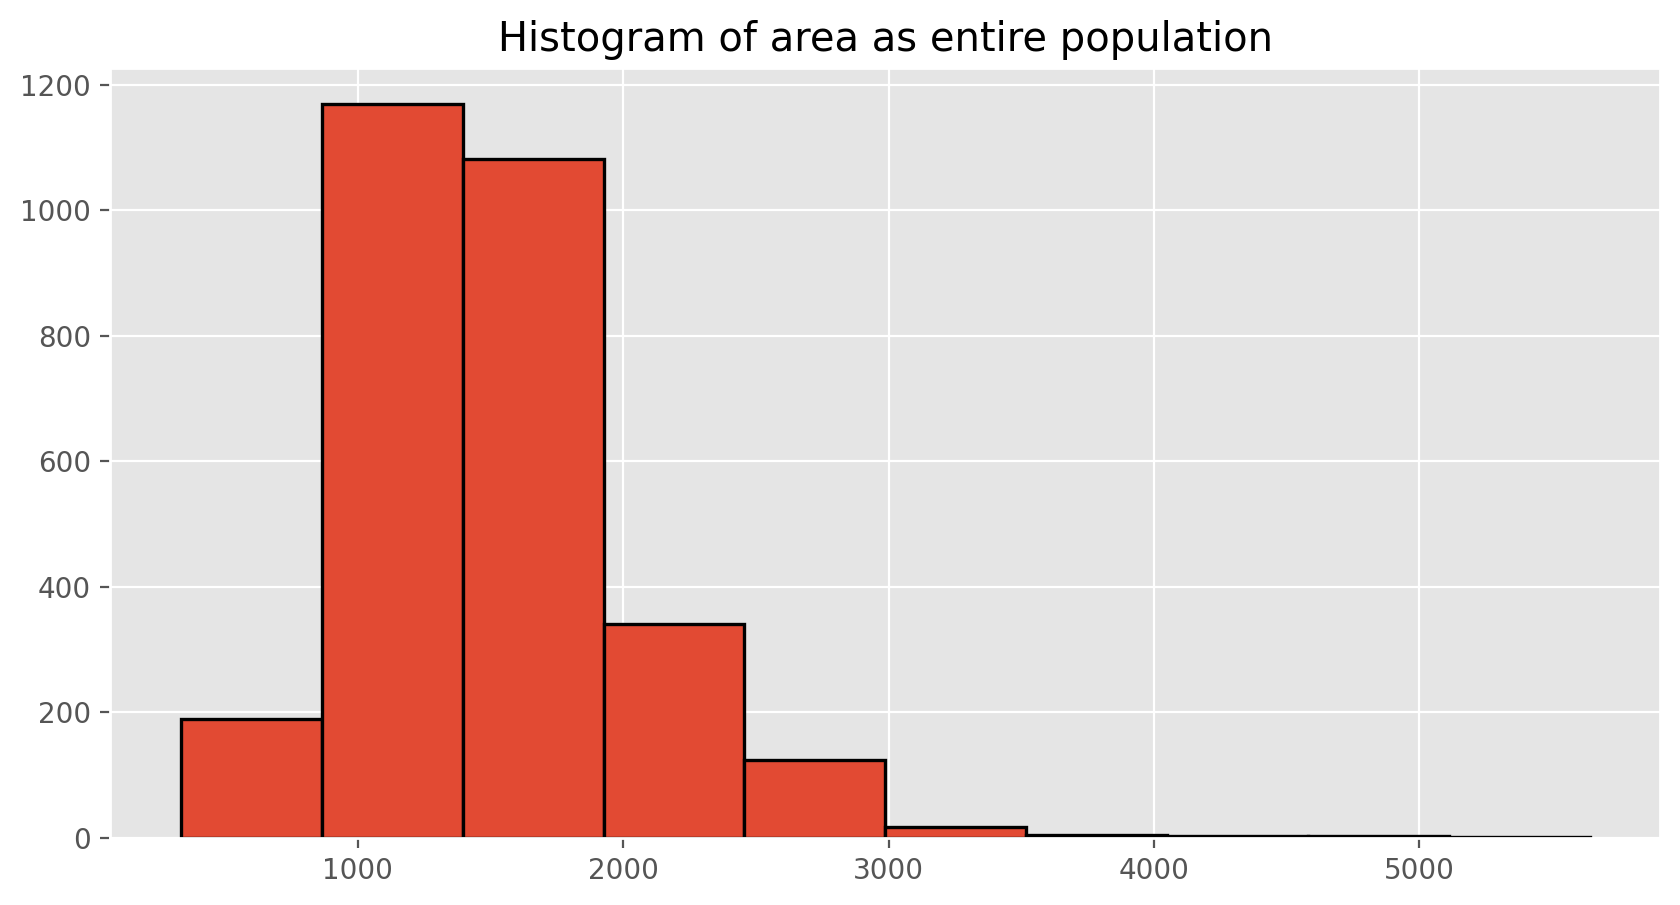

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)

plt.hist(area, edgecolor = 'black', linewidth = 1.2)
plt.title("Histogram of area as entire population")
plt.show();

##### Exercise  1
- Describe this population distribution.
Ans :- The living area in the data between 2006 and 2010 has mean of ~ 1500. the shape of the histogram is slightly bell shaped and seems like its right skewed To a small extent.

### The unknown sampling distribution

Gathering the detials of the entire population is nearly impossible. so we are taking the sample of the population
to understand the population.

In [6]:
sampl1 = area.sample(50)

In [7]:
sampl1

2321    2021
848     1840
2385    1850
2111    1795
2036    2180
514     1852
161     1224
556      864
707      861
626     1986
949     1961
1133    1663
2768     914
64      1839
2470    1142
1170    1557
333      874
2832    1708
392     1792
1364    1236
190     1470
1766    2385
304     1128
2772     990
1870    1680
2050    1005
1983    1131
2735    2201
1717    1302
2164    1330
625     1567
1472    1536
2469    1301
2085    1342
1046    1069
2550    1248
1022    2872
125     1728
1931    1560
6       1338
529     2094
2073    2060
336     2432
2391    2324
2364    1092
1579    1495
1228    1820
1668     872
1144    1737
415     1441
Name: Gr.Liv.Area, dtype: int64

##### Exercise 2
Describe the distribution of this sample. How does it compare to the distribution of the population?

Figuring out the mean to figure out the sample average.

In [8]:
sampl1.mean()

1574.18

Depending on which 50 homes  selected, the estimate could be a bit above or a bit below the true population mean of 1499.69 square feet

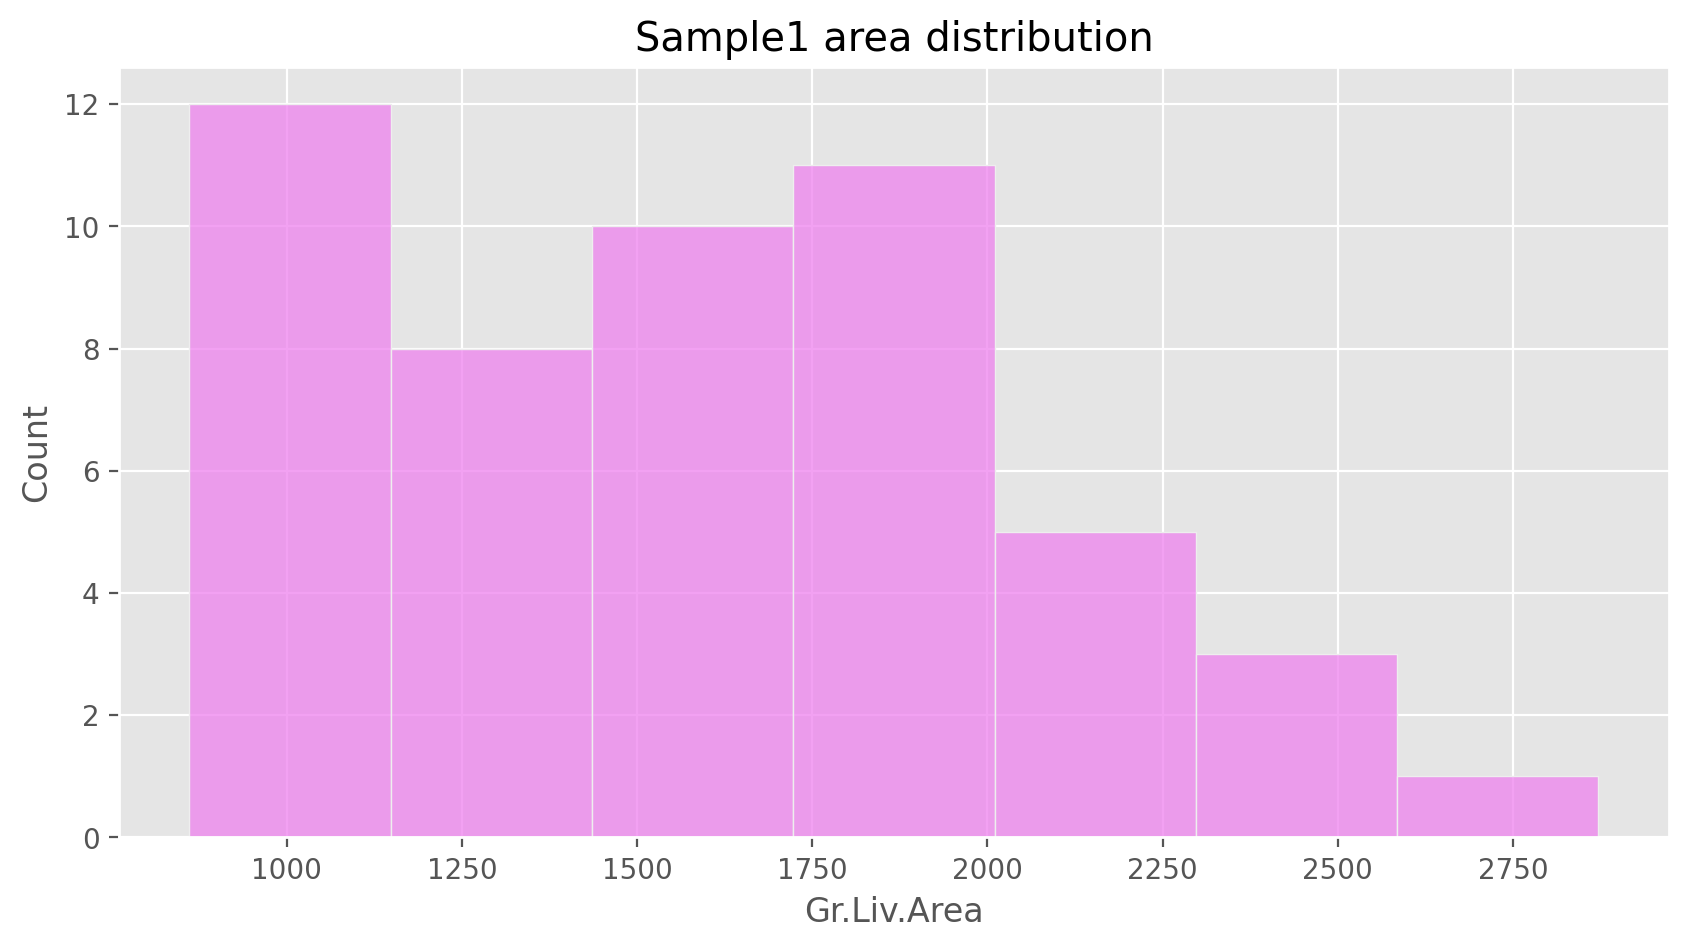

In [9]:
import seaborn as sns
sns.histplot(sampl1, color = 'violet')
plt.title("Sample1 area distribution")
plt.show()

Ans:-
The average of the sample is quite similar to that of the entire population. Nevertheless, when we look at the range of values in the sample, it's not as wide as what we see in the entire population. Also, if we take a closer look at the distribution of the sample, we notice a slightly right skewed distrubution.

### Exercise #3: 
- Take a second sample, also of size 50, and call it samp2. How does the mean of samp2 compare with the mean of samp1? Suppose we took two more samples, one of size 100 and one of size 1000. Which would you think would provide a more accurate estimate of the population mean?

In [10]:
sampl2 = area.sample(50)
print(f"Sample 2 mean is {sampl2.mean()}")

Sample 2 mean is 1498.64


Ans:- The average of samp2 is remarkably similar to samp1, with just a small ~ 25-unit difference. With a larger sample size of 1000, we can expect a more precise estimate of the population mean, as the sheer size of the sample plays a critical role in determining accuracy.

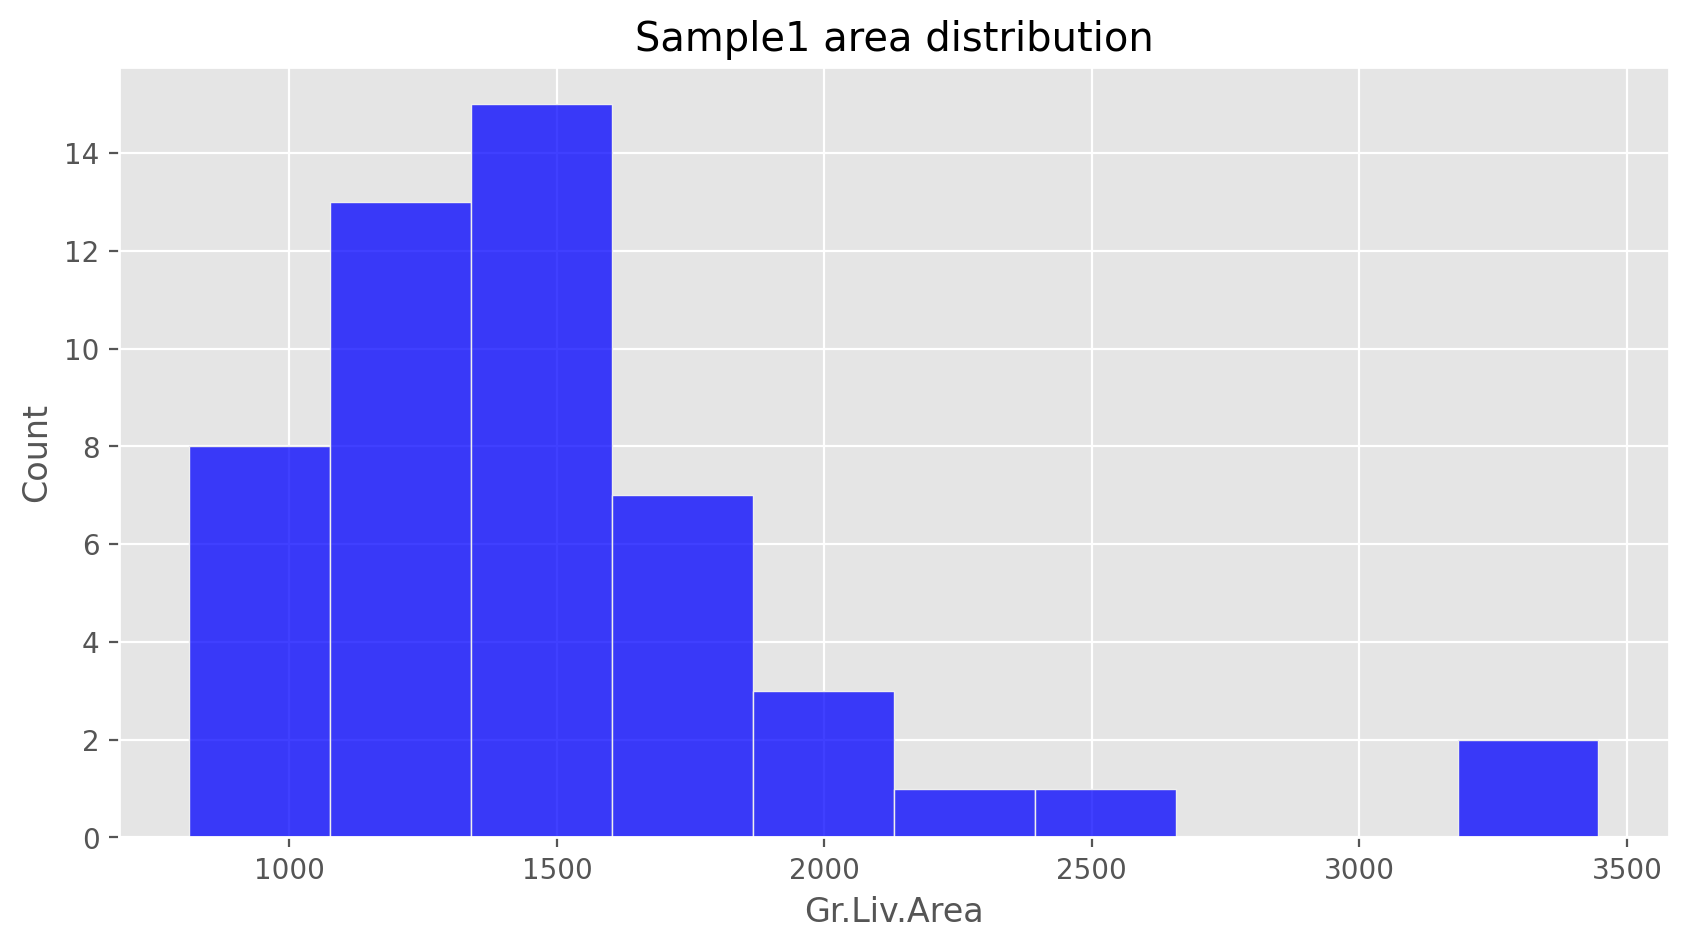

In [11]:
import seaborn as sns
sns.histplot(sampl2, color='blue')
plt.title("Sample1 area distribution")
plt.show()

Not surprisingly, every time we take another random sample, we get a different sample mean. It's useful to get a sense of just how much variability we should expect when estimating the population mean this way. The distribution of sample means, called the sampling distribution, can help us understand this variability. In this lab, because we have access to the population, we can build up the sampling distribution for the sample mean by repeating the above steps many times. Here we will generate 5000 samples and compute the sample mean of each.

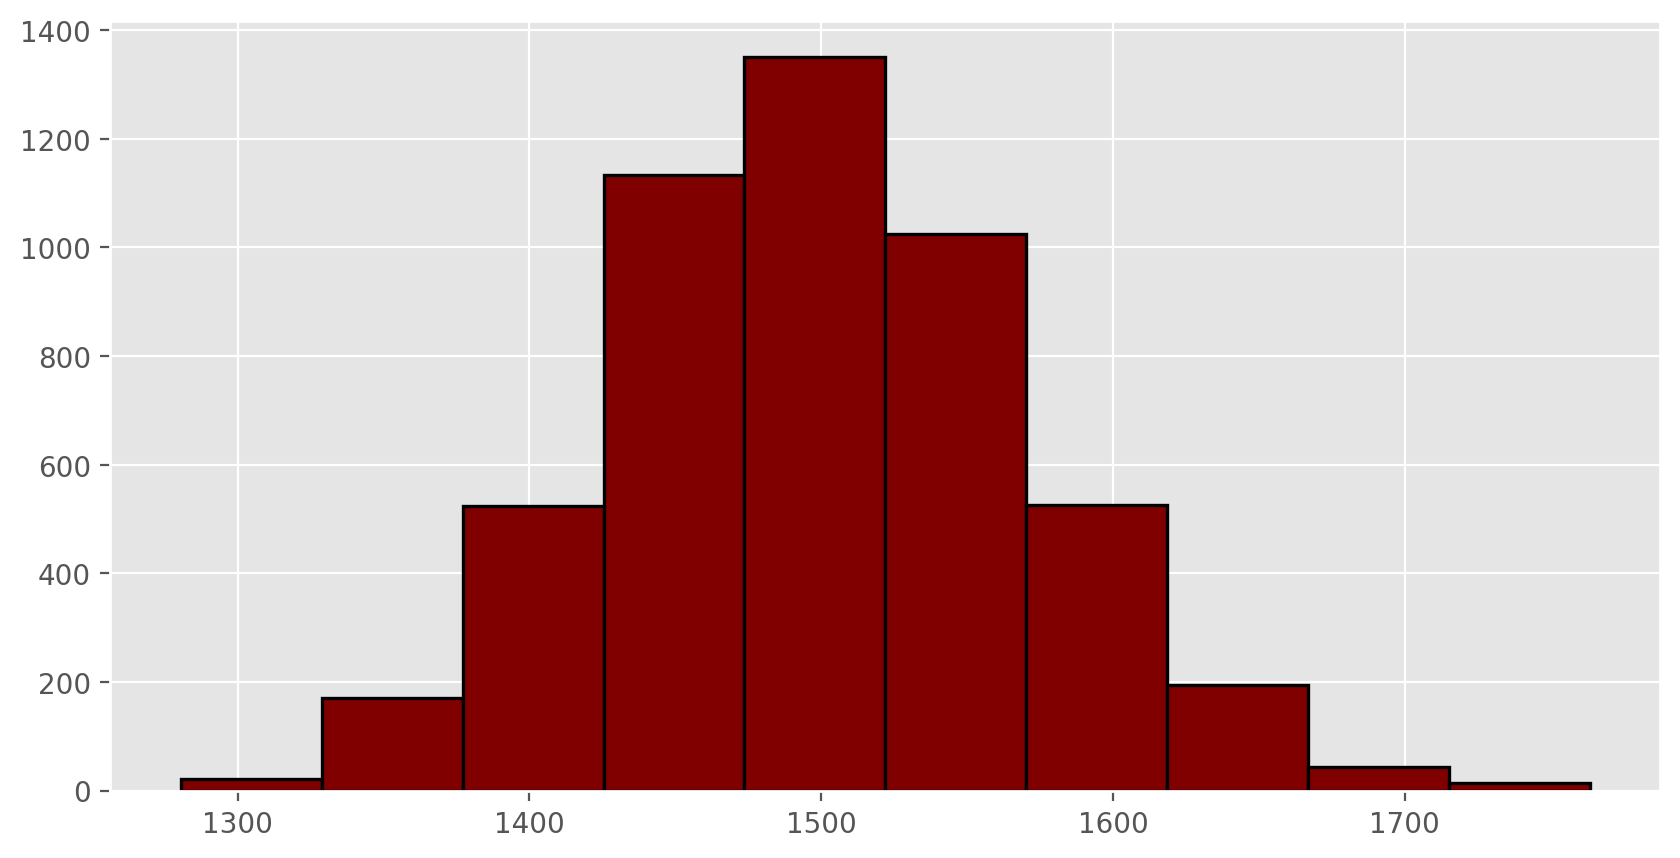

In [12]:
sample_means50 = [area.sample(50).mean() for i in range(0, 5000)]

plt.rcParams['figure.figsize'] = (10,5)
plt.hist(sample_means50, edgecolor = 'black', linewidth = 1.2, color = 'maroon')
plt.show();

If you would like to adjust the bin width of your histogram to show a little more detail, you can do so by changing the bins parameter.

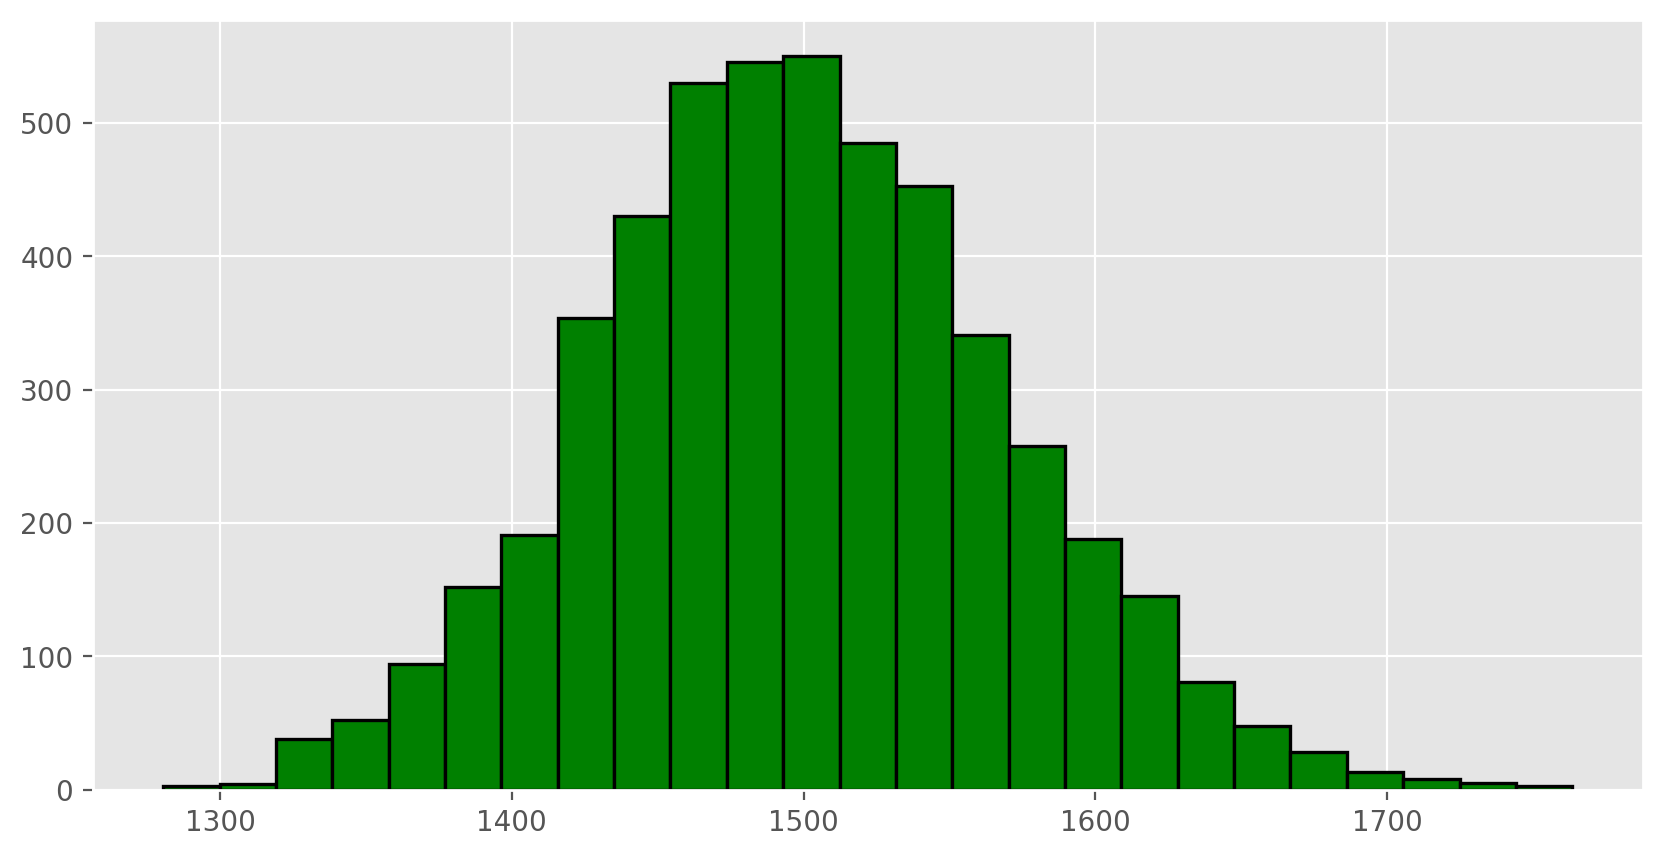

In [13]:
plt.rcParams['figure.figsize'] = (10,5)
plt.hist(sample_means50, edgecolor = 'black', linewidth = 1.2, bins = 25, color = 'green')
plt.show();

Here we use Python to take 5000 samples of size 50 from the population, calculate the mean of each sample, and store each result in a variable called sample_means50. Next, we'll review how this set of code works.

#### Exercise 4
- How many elements are there in sample_means50? Describe the sampling distribution, and be sure to specifically note its center. Would you expect the distribution to change if we instead collected 50,000 sample means?

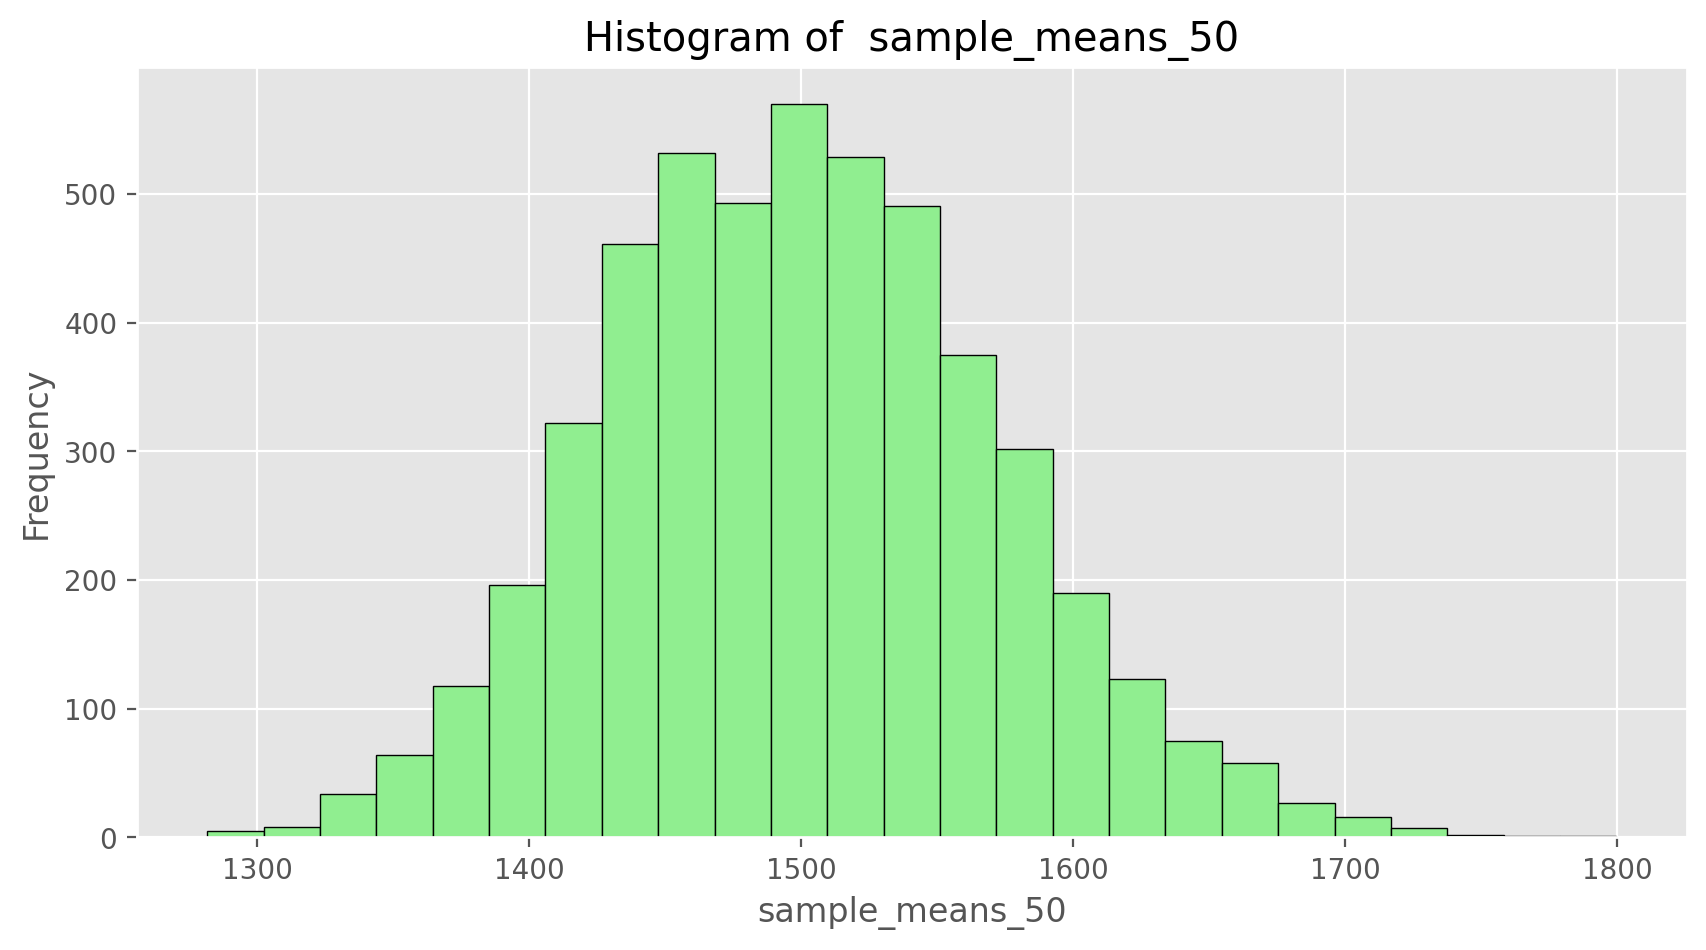

In [14]:
import numpy as np
import matplotlib.pyplot as plt

sample_means_50 = np.empty(5000)

for i in range(5000):
    samp = np.random.choice(area, 50)
    sample_means_50[i] = np.mean(samp)

plt.hist(sample_means_50, bins=25, edgecolor = 'black', color='lightgreen')
plt.title("Histogram of  sample_means_50")
plt.xlabel("sample_means_50")
plt.ylabel("Frequency")
plt.show()


In [15]:
sample_means_50_df = pd.DataFrame({'Sample_Means_50': sample_means_50})
sample_means_50_df.describe()

,Sample_Means_50
count,5000.000000
mean,1500.415964
std,71.697922
min,1281.640000
25%,1449.555000
50%,1498.090000
75%,1548.245000
max,1799.660000


Ans:- There are a total of 5,000 samples in the `sample_means_50` dataset. When we examine the sampling distribution, it seems to exhibit a fairly normal or bell-shaped pattern, with a central tendency around 1500. I anticipate that as we continue to collect more samples, the distribution is likely to maintain its current shape, resembling a normal distribution even more. Additionally, I expect the center, which is currently around 1500, to remain relatively stable throughout this process.

### Exercise 5: 
###### To make sure you understand what you’ve done in this loop, try running a smaller version. Initialize a vector of 100 zeros called sample_means_small. Run a loop that takes a sample of size 50 from area and stores the sample mean in sample_means_small, but only iterate from 1 to 100. Print the output to your screen (type sample_means_small into the console and press enter). How many elements are there in this object called sample_means_small? What does each element represent?

In [16]:
import pandas as pd

# Create an empty DataFrame
sample_means_small_df = pd.DataFrame(columns=['Sample_Means_Small'])

for i in range(100):
    samp = pd.Series(pd.Series(area).sample(50))
    sample_mean = samp.mean()
    sample_means_small_df = sample_means_small_df.append({'Sample_Means_Small': sample_mean}, ignore_index=True)
    print(i)

# Display the DataFrame
print(sample_means_small_df)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
    Sample_Means_Small
0              1557.94
1              1591.24
2              1496.32
3              1421.96
4              1490.52
..                 ...
95             1440.82
96             1528.18
97             1443.26
98             1495.38
99             1556.38

[100 rows x 1 columns]


Ans:- In this dataset, we have a total of 100 values, with each value representing the mean of one specific sample. These 100 samples were collected independently.

# Sample size and the sampling distribution

The sampling distribution provides valuable insights into estimating the average living area in Ames homes. Its center, which aligns with the true population average, demonstrates that the sample mean is an unbiased estimator, and the distribution's spread reveals the extent of variability introduced by sampling just 50 home sales.


To get a sense of the effect that sample size has on our distribution, let's build up two more sampling distributions: one based on a sample size of 10 and another based on a sample size of 100.

In [17]:
sample_means10 = [area.sample(10).mean() for i in range(0, 5000)]
sample_means100 = [area.sample(100).mean() for i in range(0, 5000)]

Visualizing the same will be as follows

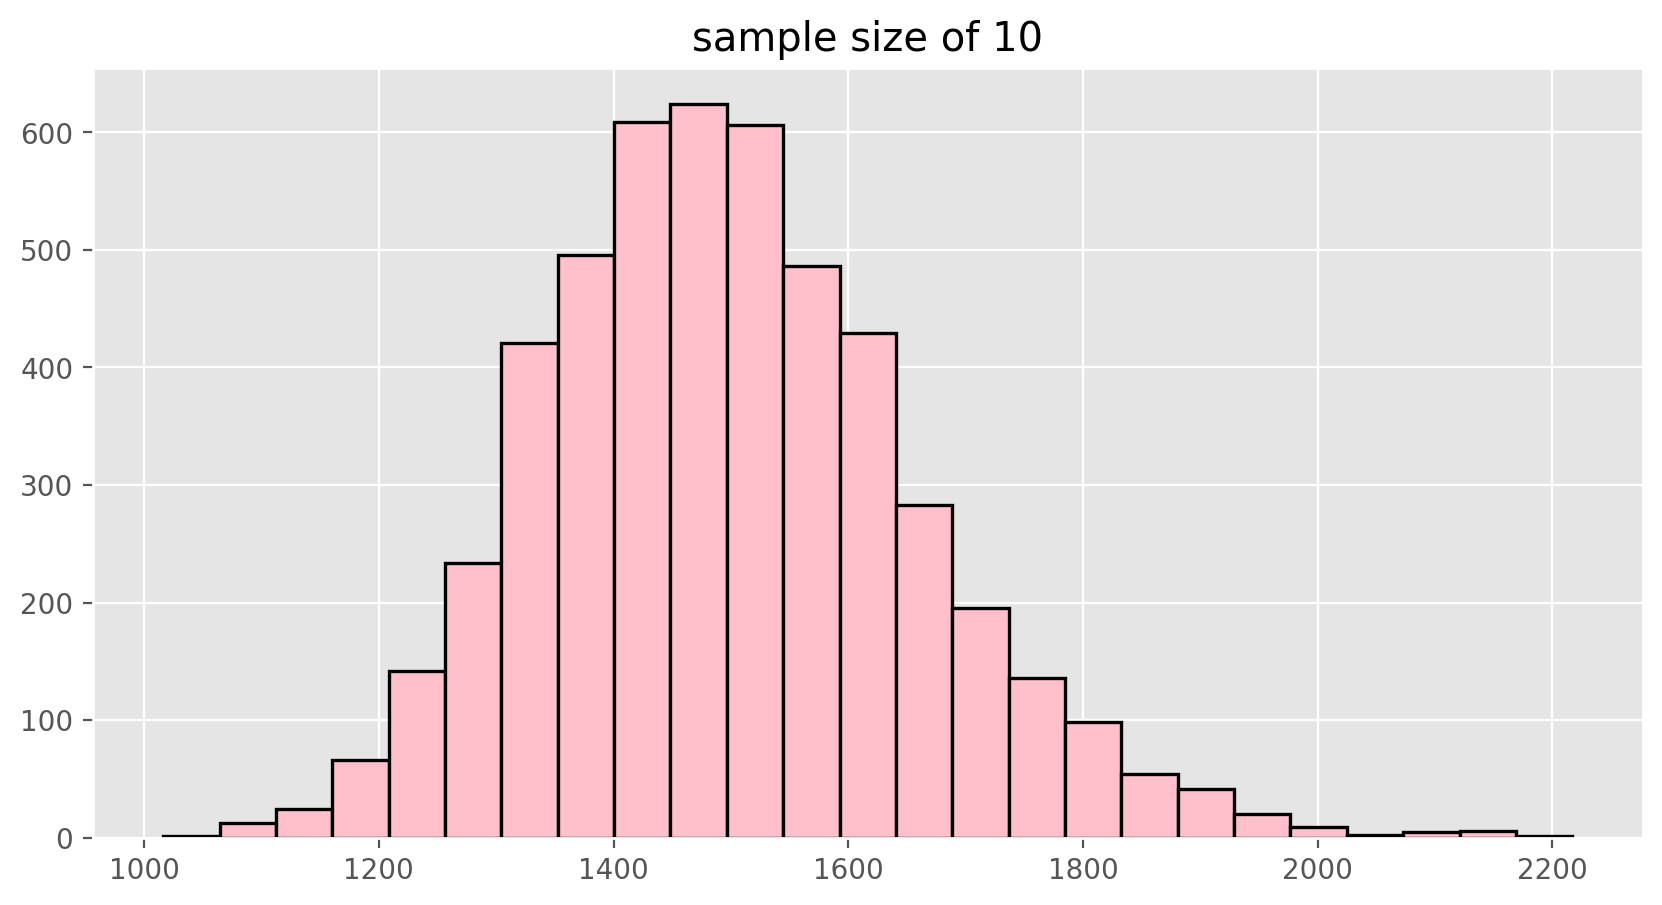

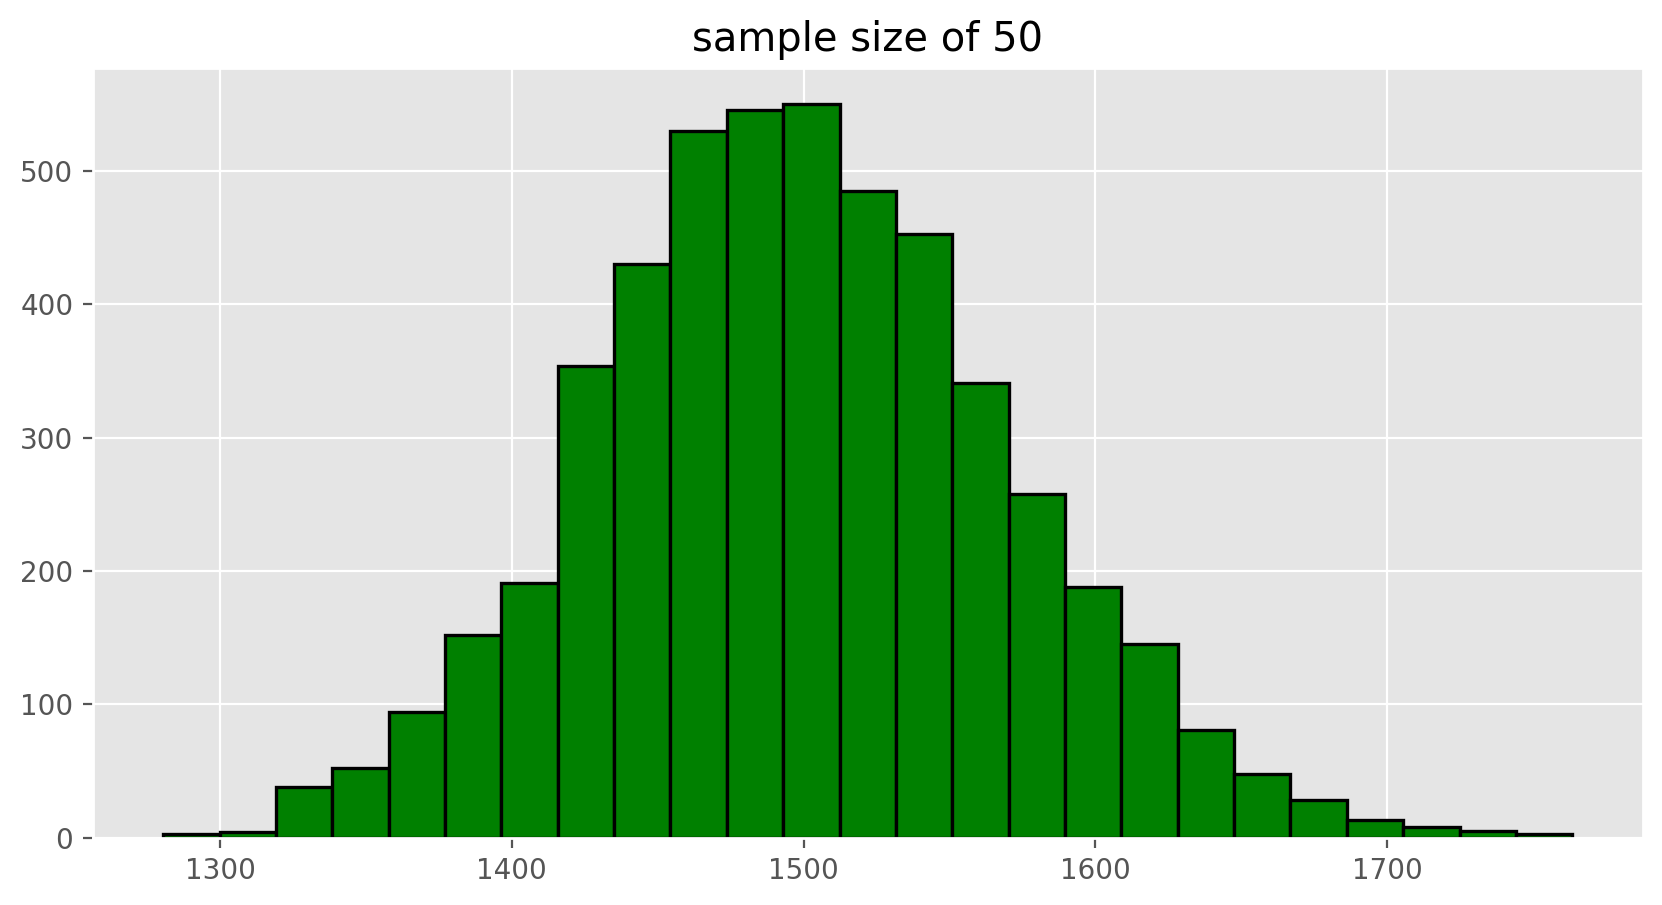

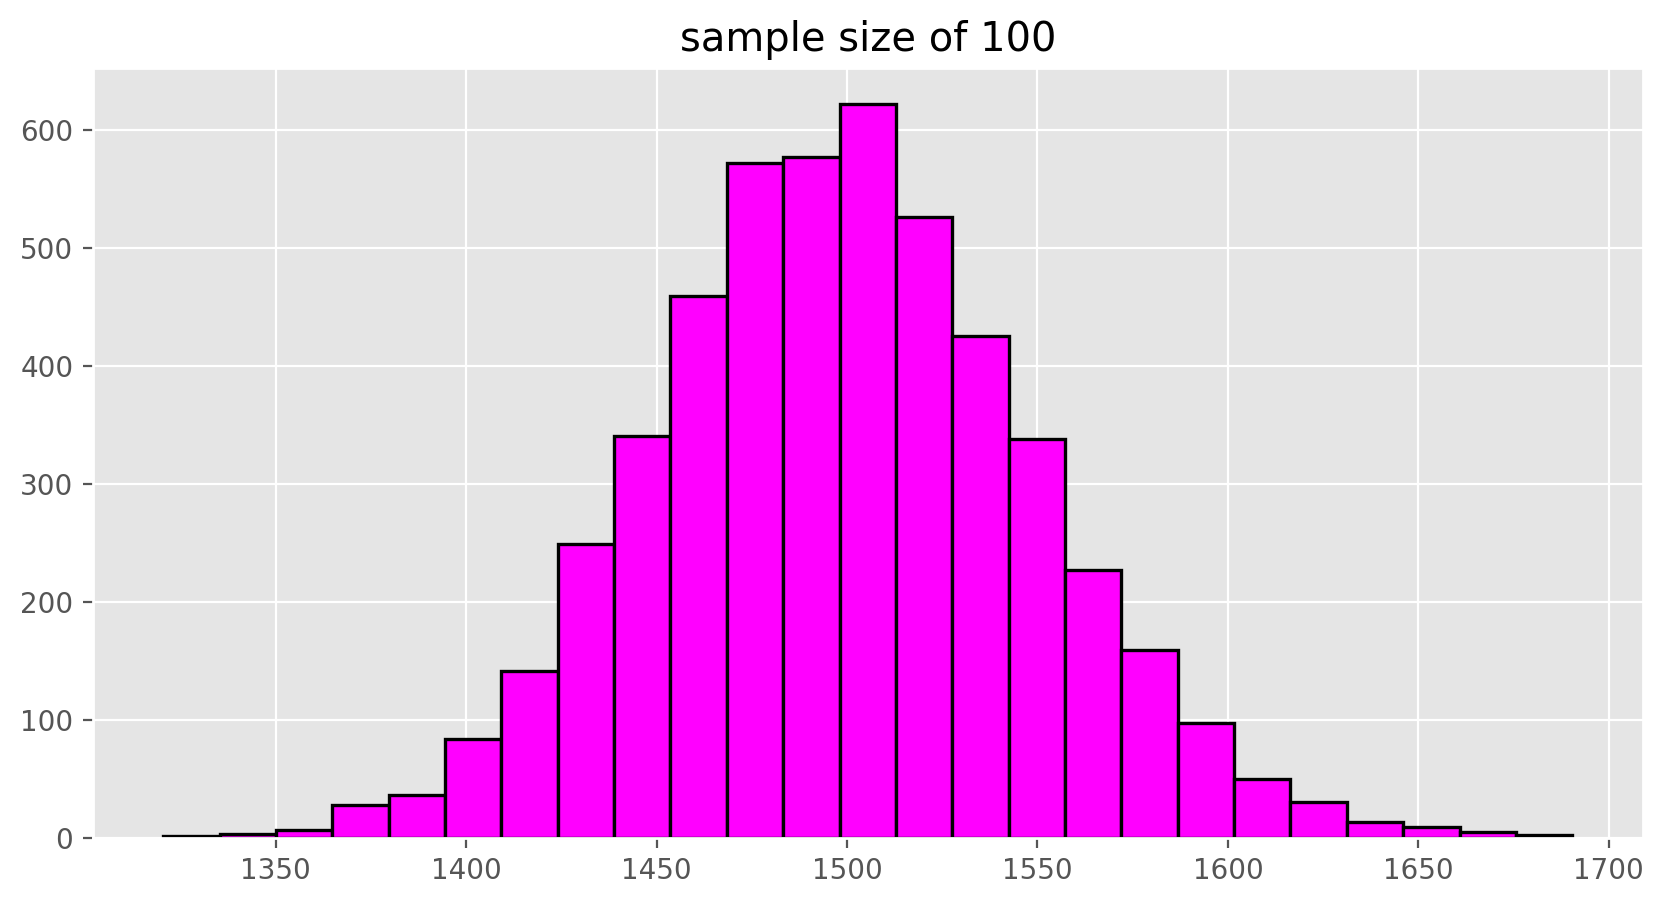

In [18]:
plt.rcParams['figure.figsize'] = (10,5)
plt.hist(sample_means10, edgecolor = 'black', linewidth = 1.2, bins = 25, color = 'pink')
plt.title("sample size of 10")
plt.show();
plt.hist(sample_means50, edgecolor = 'black', linewidth = 1.2, bins = 25, color= 'green')
plt.title("sample size of 50")
plt.show();
plt.hist(sample_means100, edgecolor = 'black', linewidth = 1.2, bins = 25, color = 'magenta')
plt.title("sample size of 100")
plt.show();

## Exercise 6: 
##### When the sample size is larger, what happens to the center? What about the spread?

- Ans :- With a larger sample size, the estimated mean becomes more precise, closely reflecting the true population mean. Simultaneously, the variability or spread of the sample means decreases, resulting in a more concentrated and reliable estimate of the population parameter.

# On Your Own
-  So far, we have only focused on estimating the mean living area in homes in Ames. Now you’ll try to estimate the mean home price.


- 1. Take a random sample of size 50 from price. Using this sample, what is your best point estimate of the population mean?

- 2. Since you have access to the population, simulate the sampling distribution for the average home price in Ames by taking 5000 samples from the population of size 50 and computing 5000 sample means. Store these means in a vector called sample_means50. Plot the data, then describe the shape of this sampling distribution. Based on this sampling distribution, what would you guess the mean home price of the population to be? Finally, calculate and report the population mean.

- 3. Change your sample size from 50 to 150, then compute the sampling distribution using the same method as above, and store these means in a new vector called sample_means150. Describe the shape of this sampling distribution, and compare it to the sampling distribution for a sample size of 50. Based on this sampling distribution, what would you guess to be the mean sale price of homes in Ames?

- 4. Of the sampling distributions from 2 and 3, which has a smaller spread? If we’re concerned with making estimates that are more often close to the true value, would we prefer a distribution with a large or small spread?

#### 1. Take a random sample of size 50 from price. Using this sample, what is your best point estimate of the population mean?

In [19]:
#population summary
price.describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [20]:
sample_price_1 = price.sample(50)
sample_price_1.mean()

197727.54

In [21]:
sample_price_1.describe()

count        50.000000
mean     197727.540000
std      129063.241048
min       37900.000000
25%      121125.000000
50%      154000.000000
75%      216000.000000
max      745000.000000
Name: SalePrice, dtype: float64

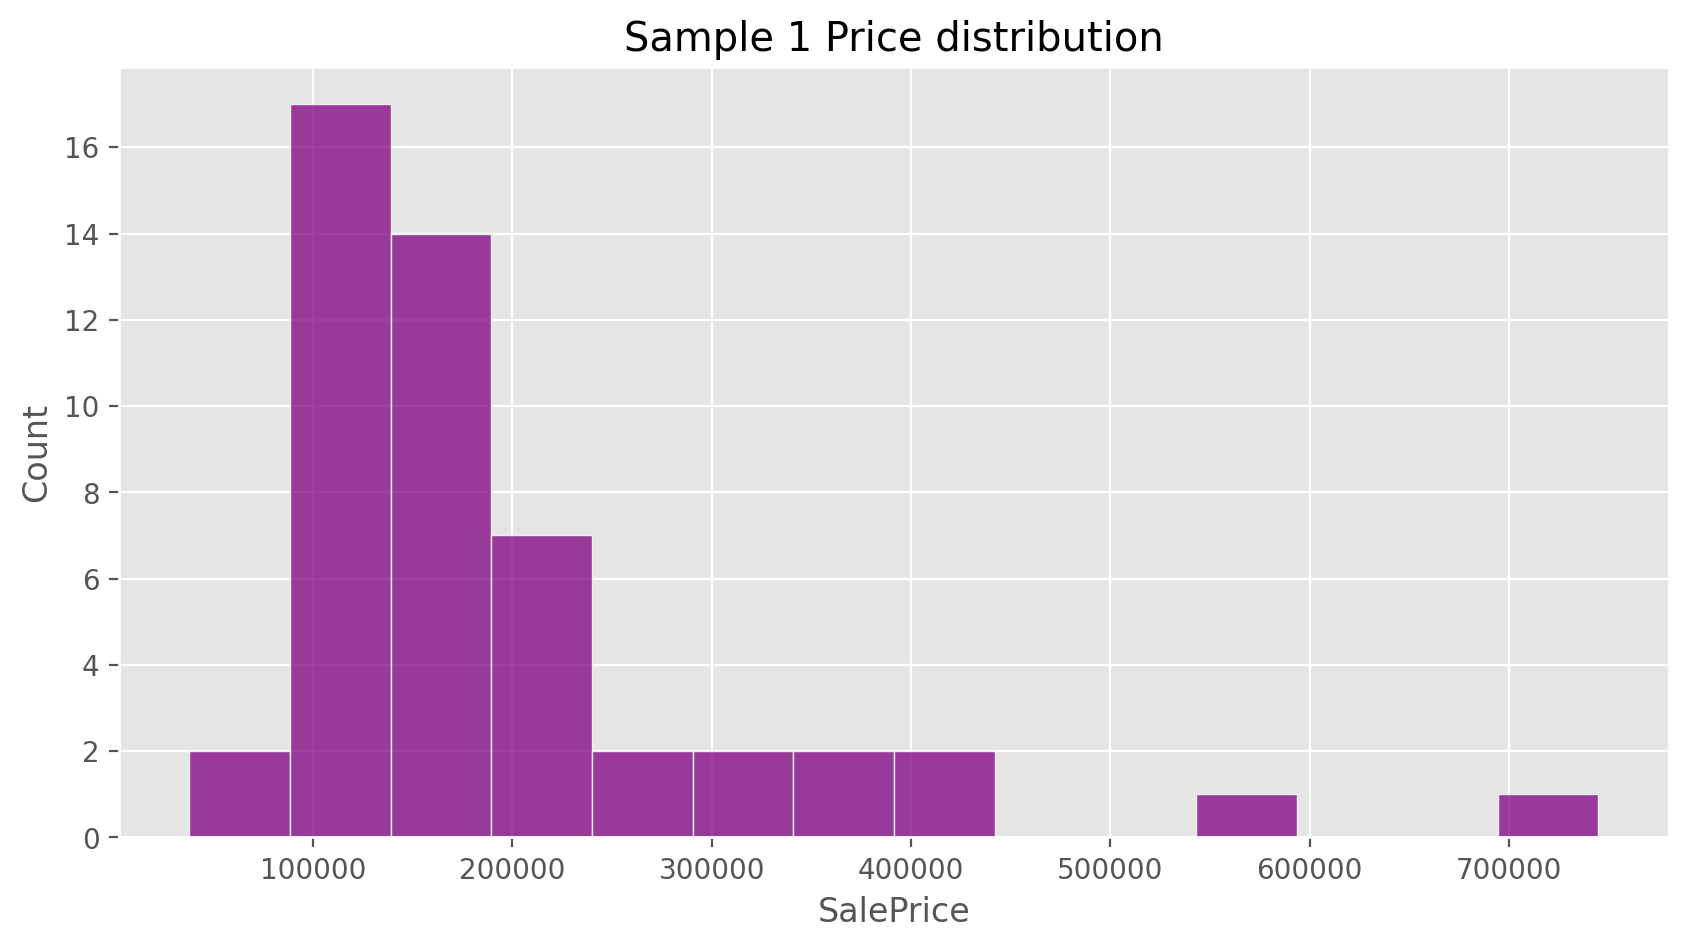

In [22]:
import seaborn as sns
sns.histplot(sample_price_1, color = 'purple')
plt.title("Sample 1 Price distribution")
plt.show()

##### Ans:- Using the sample, the best point estimate of the population mean is 188278.

#### 2. Since you have access to the population, simulate the sampling distribution for x¯price by taking 5000 samples from the population of size 50 and computing 5000 sample means. Store these means in a vector called sample_means50. Plot the data, then describe the shape of this sampling distribution. Based on this sampling distribution, what would you guess the mean home price of the population to be? Finally, calculate and report the population mean.

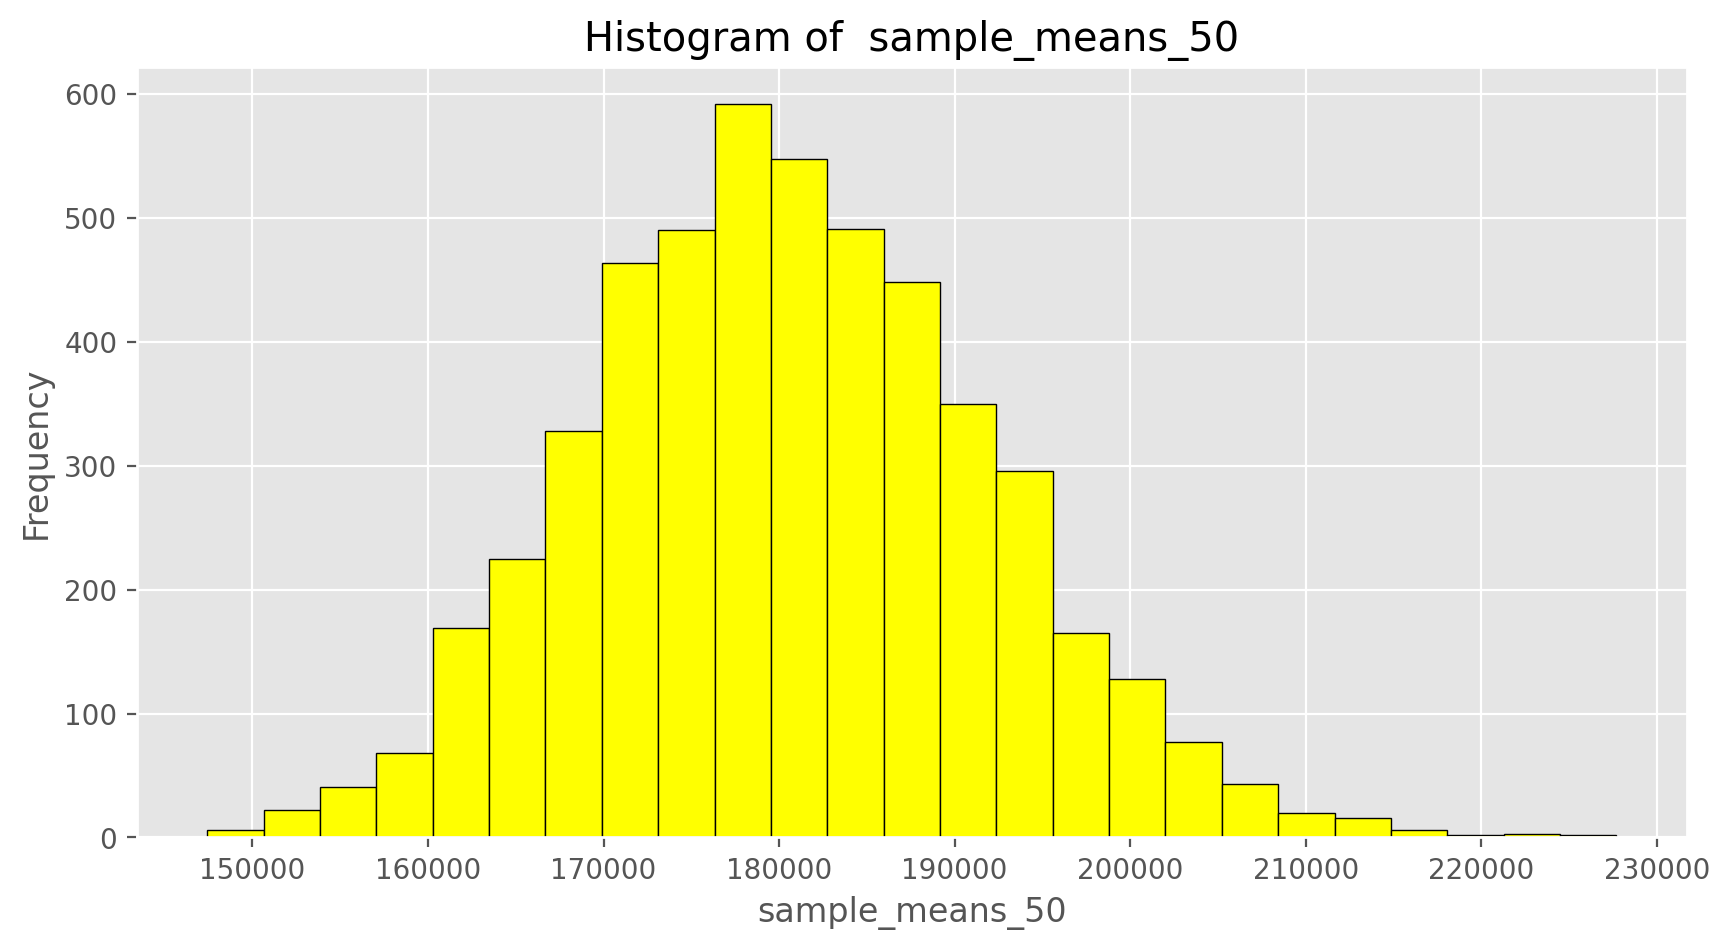

In [23]:
import numpy as np
import matplotlib.pyplot as plt

sample_means_50 = np.empty(5000)

for i in range(5000):
    samp = np.random.choice(price, 50)
    sample_means_50[i] = np.mean(samp)

plt.hist(sample_means_50, bins=25, edgecolor = 'black', color='yellow')
plt.title("Histogram of  sample_means_50")
plt.xlabel("sample_means_50")
plt.ylabel("Frequency")
plt.show()

In [24]:
sample_means_50_df = pd.DataFrame({'Sample_Means_50': sample_means_50})
sample_means_50_df.describe()

,Sample_Means_50
count,5000.000000
mean,180574.960908
std,11301.425551
min,147423.200000
25%,172643.350000
50%,180041.720000
75%,188088.720000
max,227699.780000


In [25]:
price.describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

The distribution displays a bell-curve shape, resembling a fairly normal distribution, with a slight rightward skew. Based on this sampling distribution, my estimated guess for the mean home price in the population would be approximately 180,000, while the actual population mean stands at 180,796. The sample_means_50's mean is also quite close, at around 180,881.542, supporting the accuracy of the estimate.

#### 3. Change your sample size from 50 to 150, then compute the sampling distribution using the same method as above, and store these means in a new vector called sample_means150. Describe the shape of this sampling distribution, and compare it to the sampling distribution for a sample size of 50. Based on this sampling distribution, what would you guess to be the mean sale price of homes in Ames?

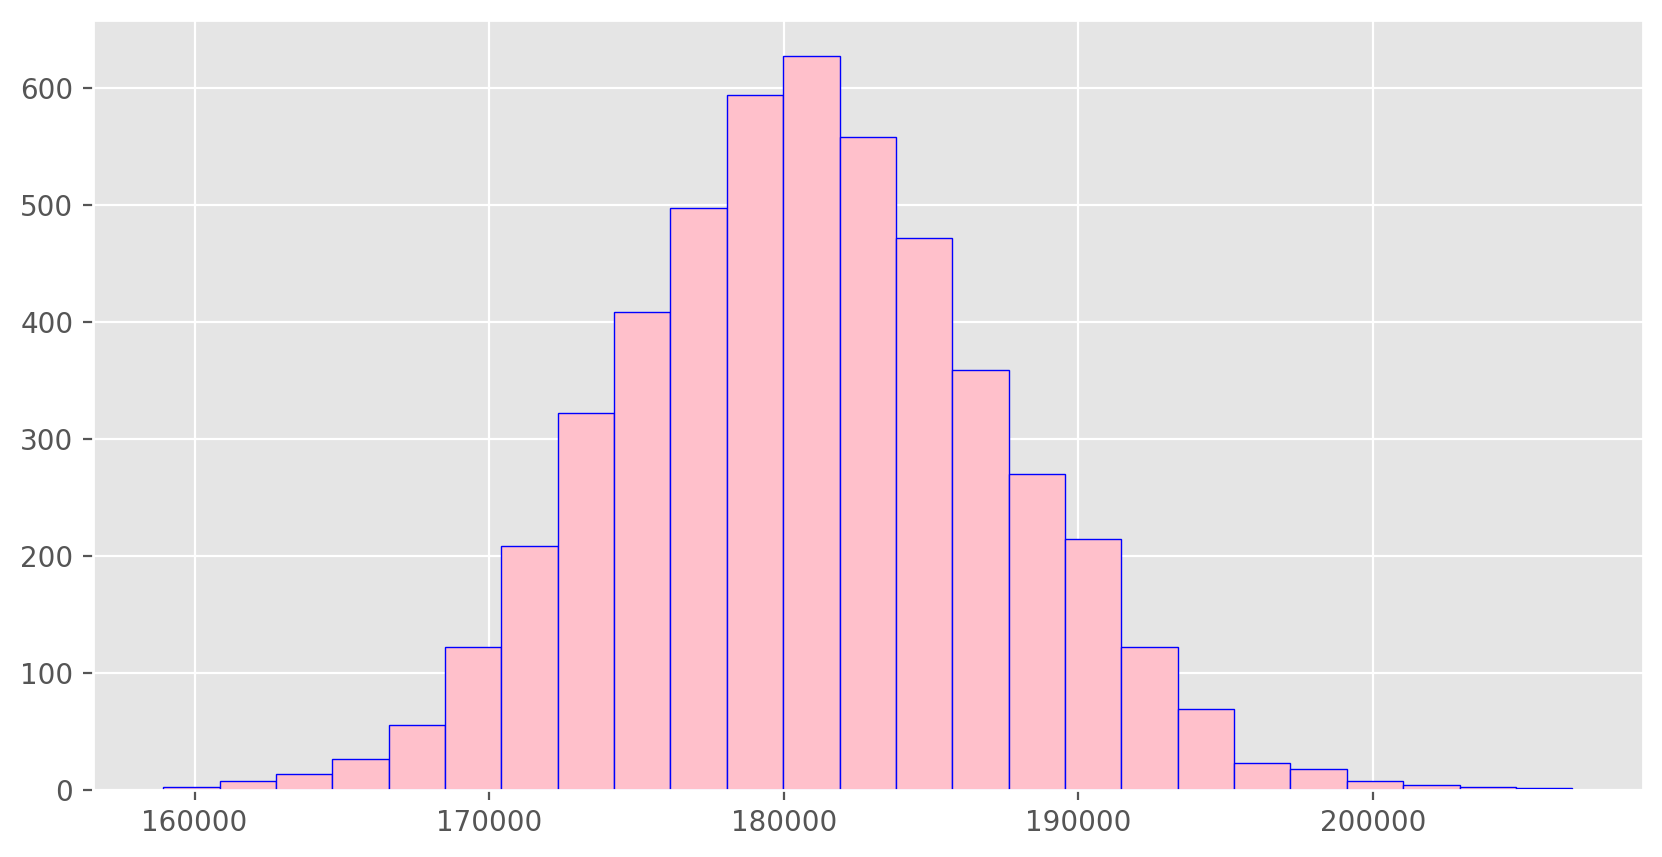

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

sample_means_150 = []

for i in range(5000):
    samp = pd.Series(price).sample(150)
    sample_mean = samp.mean()
    sample_means_150.append(sample_mean)

sample_means_150_df = pd.DataFrame({'Sample_Means_150': sample_means_150})

plt.hist(sample_means_150, bins=25, edgecolor = 'blue', color='pink')
plt.show()


In [27]:
sample_means_150_df.describe()

,Sample_Means_150
count,5000.000000
mean,180849.194509
std,6325.000784
min,158932.033333
25%,176497.015000
50%,180791.420000
75%,184990.518333
max,206762.006667


Ans:- Sample_means_50 has the mean of 180574.960908 and sample_means_150 has the mean of  180849.194509 which is almost equal has a small difference.
The shape of this sampling distribution exhibits greater symmetry, suggesting a more normal or bell-shaped pattern. Consequently, I would estimate the mean sale price of homes in Ames to be approximately 180,000 based on this distribution's central tendency.


#### 4. Of the sampling distributions from 2 and 3, which has a smaller spread? If we’re concerned with making estimates that are more often close to the true value, would we prefer a distribution with a large or small spread?

Ans:- The sampling distribution with a sample size of 150 exhibits a narrower spread in comparison to the distribution with a sample size of 50. We generally favor a distribution with a smaller spread because it is more likely to yield a more precise and accurate estimate of the population mean, given its reduced variability and increased consistency.